![image.png](https://i.imgur.com/a3uAqnb.png)

# **⚡ Wind Turbine Object Detection with RT-DETR**
In this lab, we will:
✅ **Use RT-DETR** for **wind turbine detection**  
✅ **Understand the dataset structure**  
✅ **Train a RT-DETR model**  
✅ **Evaluate the model on the validation set**  
✅ **Run inference on test images**  

---

## **1️⃣ Understanding the Dataset Structure**
The dataset follows the **RT-DETR format**, which consists of:
📂 **train/** → Training images & labels  
📂 **valid/** → Validation images & labels  
📂 **test/** → Test images (for inference)  
📜 **data.yaml** → Defines dataset paths & class names  

### **🔹 DETR Dataset Folder Structure**
```
drone_dataset/
│── train/
│   │── images/
│   │   ├── pic_031.jpg
│   │   ├── pic_032.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_031.txt
│   │   ├── pic_032.txt
│   │   ├── ...
│
│── valid/
│   │── images/
│   │   ├── pic_035.jpg
│   │   ├── pic_036.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_035.txt
│   │   ├── pic_036.txt
│   │   ├── ...
│
│── test/
│   │── images/
│   │   ├── pic_040.jpg
│   │   ├── pic_041.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_040.txt
│   │   ├── pic_041.txt
│   │   ├── ...
│
│── data.yaml
```
Each **image** has a **corresponding label** file with the **same name**, but a `.txt` extension.

---

## **2️⃣ What’s Inside a RT-DETR Label File?**
Each `.txt` file contains **annotations** in this format:

```
<class_id> <x_center> <y_center> <width> <height>
```

✅ **All values are normalized** between **0 and 1**  
✅ The **bounding box** is defined by its **center** and **size**  

### **🔹 Example (`pic_031.txt`)**
```
0 0.526 0.448 0.12 0.15
1 0.731 0.602 0.18 0.22
```
- **First column** → Class ID (`0` = cable tower, `1` = turbine)  
- **Rest** → Bounding box (normalized)  

---

## **3️⃣ Loading the Dataset**

In [1]:
# # Please uncomment this out when you are running this lab on google colab!
# import os

# # Set KaggleHub cache to a directory inside /content/
# os.environ["KAGGLEHUB_CACHE"] = "/content/data"

In [2]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kylegraupe/wind-turbine-image-dataset-for-computer-vision")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wind-turbine-image-dataset-for-computer-vision


In [3]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['cable tower', 'turbine']

roboflow:
  workspace: kyle-graupe-jobhn
  project: wind-farms
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/kyle-graupe-jobhn/wind-farms/dataset/5


## **4️⃣ Training a DETR Model**
We will fine-tune a **pretrained DETR model**.

In [ ]:
# Install Ultralytics library which has RT-DETR
!pip install -q ultralytics

In [ ]:
from ultralytics import RTDETR
import matplotlib.pyplot as plt
# Load RT-DETR model (Large version)
model = RTDETR("rtdetr-l.pt")

#### Let's try to predict an image before training


image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg: 640x640 1 bench, 2 birds, 3 cows, 69.7ms
Speed: 14.5ms preprocess, 69.7ms inference, 20.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


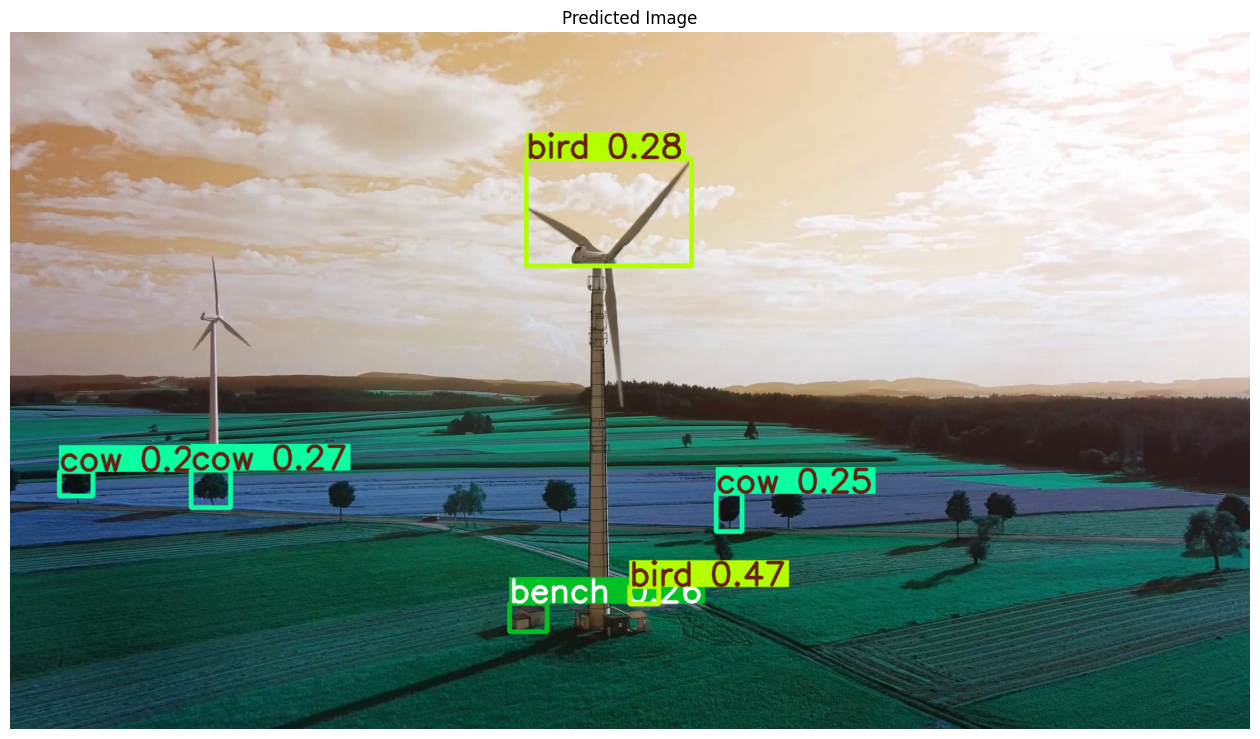

In [6]:
# Load an image and run inference
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(16, 16))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


## OMG, AI will take over the world.🫠



#### Nevermind, let's train it! 🚀

In [7]:
# Train on the wind turbine dataset
model.train(data=dataset_path, epochs=5, imgsz=640)

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/wind-turbine-image-dataset-for-computer-vision/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]

Overriding model.yaml nc=80 with nc=2
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

 21                  -1  3   2232320  ultralytics.nn.modules.block.RepC3           [512, 256, 3]                 
 22                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 23            [-1, 17]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 24                  -1  3   2232320  ultralytics.nn.modules.block.RepC3           [512, 256, 3]                 
 25                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 26            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 27                  -1  3   2232320  ultralytics.nn.modules.block.RepC3           [512, 256, 3]                 
 28        [21, 24, 27]  1   7305962  ultralytics.nn.modules.head.RTDETRDecoder    [2, [256, 256, 256]]          
rt-detr-l summary: 457 layers, 32,810,186 parameters, 32,810,186 gradients, 108.0 GFLOPs

100%|██████████| 5.35M/5.35M [00:00<00:00, 80.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.5±5.9 MB/s, size: 211.7 KB)


train: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:02<00:00, 913.39it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.2±29.8 MB/s, size: 153.7 KB)


val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 906.44it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/166 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        1/5      12.2G      2.359      1.223      1.276        161        640:   1%|          | 1/166 [00:01<04:33,  1.66s/it]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues t

                   all        247       1562      0.695      0.171      0.123     0.0318



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/166 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        2/5      12.8G     0.5635     0.5161     0.1496        133        640:   1%|          | 1/166 [00:01<03:01,  1.10s/it]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues t

                   all        247       1562      0.494       0.34       0.29     0.0918



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/166 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        3/5      12.4G      0.494     0.4816     0.1332        148        640:   1%|          | 1/166 [00:01<03:04,  1.12s/it]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues t

                   all        247       1562      0.542      0.384       0.38      0.124



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/166 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        4/5      12.5G     0.3924     0.4574    0.09018        171        640:   1%|          | 2/166 [00:02<02:52,  1.05s/it]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues t

                   all        247       1562      0.552       0.47      0.486      0.157



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/166 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        5/5      12.6G     0.3367        0.4    0.06771        116        640:   1%|          | 1/166 [00:01<02:55,  1.07s/it]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues t

                   all        247       1562      0.744       0.46      0.538      0.194



5 epochs completed in 0.257 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 66.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 66.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


                   all        247       1562      0.812      0.475      0.541      0.197
           cable tower          7         24          1      0.237      0.404      0.116
               turbine        239       1538      0.624      0.713      0.679      0.277
Speed: 0.2ms preprocess, 15.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc42da12cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## **5️⃣ Evaluating the Model**
We use **mAP@0.5:0.95** to assess performance.

In [8]:
# Run validation
metrics = model.val(data=dataset_path)

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 31,987,850 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 366.6±199.9 MB/s, size: 153.2 KB)


val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 1497.73it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


                   all        247       1562      0.811      0.479      0.543      0.197
           cable tower          7         24          1      0.246      0.408      0.118
               turbine        239       1538      0.623      0.712      0.679      0.277
Speed: 0.9ms preprocess, 34.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train2


## **6️⃣ Running Inference on Test Images**



image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg: 640x640 2 turbines, 70.7ms
Speed: 3.3ms preprocess, 70.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


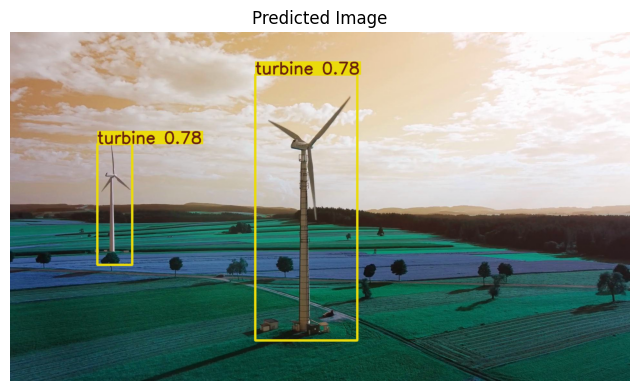

In [12]:
# Load an image and run inference
model = RTDETR("/content/runs/detect/train/weights/best.pt")  # Use the best weights which exist in this path
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


### 🚀 **Now you have a working DETR object detection pipeline for wind turbines!**

![image.png](https://i.imgur.com/rGGLEsK.png)

### Contributed by: Abdulrahman Alfrihidi